In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory = "/content/drive/MyDrive/4.Kurtsoa/BH/BH Praktika/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#SA parameter tuning

In [ ]:

df = pd.read_csv(directory + "data/SA/probakSAhamming.csv")
#print(df.head(10))

df.drop(['Algoritmoa', 'Ingurunea', "Evals", "Denbora(s)", "maxEvals", "greedy"], axis = 1)
!


In [ ]:
df = df.groupby(['hasProb', "tries"], as_index=False, sort=False)['Fitness'].mean()

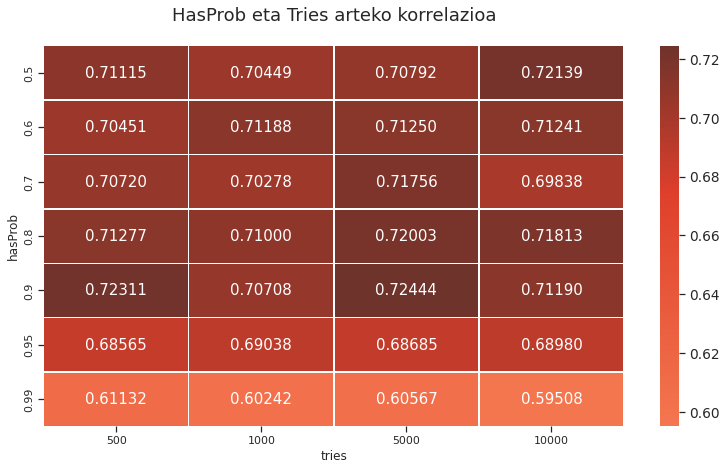

In [ ]:
# Create a pivot table
from  matplotlib.colors import LinearSegmentedColormap
cols = sns.color_palette("Greys").as_hex()[-1]
cols = sns.color_palette("OrRd").as_hex()[3:-1] + [cols]
cmap = LinearSegmentedColormap.from_list('', cols)
#cmap = ListedColormap()

result = df.pivot(index='hasProb',columns='tries',values='Fitness')
# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "HasProb eta Tries arteko korrelazioa"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.set(font_scale=1.25)
# Use the heatmap function from the seaborn package
sns.heatmap(result,annot=True,fmt=".5f", cmap = cmap, center = 0.675, linewidths=0.30,ax=ax)



# Display the Pharma Sector Heatmap
plt.show()

#EDA parameter tunning

In [ ]:

df = pd.read_csv(directory + "data/EDA/probak2.csv")
#print(df.head(10))

df.drop(["Instantzia","Algoritmoa","Evals","Fitness", "Denbora(s)", "PopSize", "NumCross", "mutProb", "mutType", "mutSize"], axis = 1)
!


In [ ]:
df = df.groupby(['PopSize', "NumCross"], as_index=False, sort=False)['Fitness'].mean()

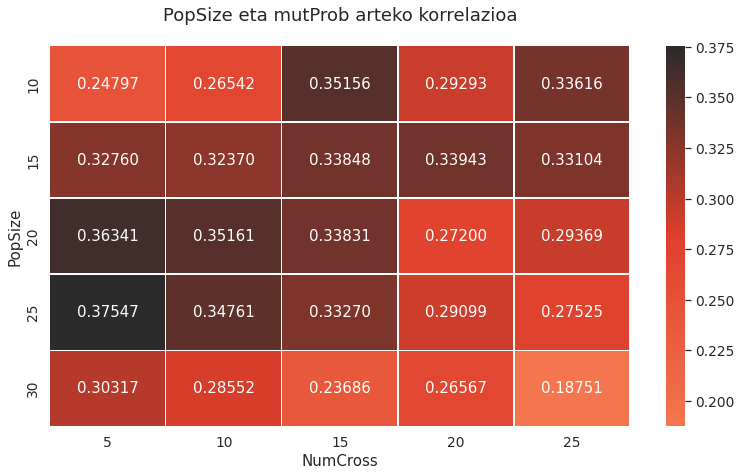

In [ ]:
# Create a pivot table
from  matplotlib.colors import LinearSegmentedColormap
cols = sns.color_palette("Greys").as_hex()[-1]
cols = sns.color_palette("OrRd").as_hex()[3:-1] + [cols]
cmap = LinearSegmentedColormap.from_list('', cols)
#cmap = ListedColormap()

result = df.pivot(index='PopSize',columns='NumCross',values='Fitness')
# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "PopSize eta mutProb arteko korrelazioa"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.set(font_scale=1.25)
# Use the heatmap function from the seaborn package
sns.heatmap(result,annot=True,fmt=".5f", cmap = cmap, linewidths=0.30,ax=ax)



# Display the Pharma Sector Heatmap
plt.show()

#GRASP vs Inkrementala

In [ ]:
df = pd.read_csv(directory + "data/emaitzak/GRASPDef.csv")
dfi = pd.read_csv(directory + "data/emaitzak/InkrementalaDef.csv")
#print(dfi.head(10))

df.drop(['k',], axis = 1)
dfi.drop(['k',], axis = 1)
!

In [ ]:
ns = [50*i for i in range(1,37)]+ [1843]
fits1 = df["Fitness"].to_numpy()
fits2 = dfi["Fitness"].to_numpy()
denb1 = df["Denbora(s)"].to_numpy()
denb2 = dfi["Denbora(s)"].to_numpy()


In [ ]:
fits = np.tile(fits1, (2, 1))
fits[1,:] = fits2
denb = np.tile(denb1, (2, 1))
denb[1,:] = denb2

In [ ]:
fits.shape

(2, 37)

In [ ]:
dataFit = pd.DataFrame({
    'ns': ns, 
    'GRASP': fits1,
    'Inkrementala': fits2})

In [ ]:
dataFit=pd.melt(dataFit, ['ns'])
dataFit.rename(columns = {'value':'Modularitatea', 'ns':'Nodo kopurua', "variable": "Algoritmoa"}, inplace = True)

Text(0.5, 1.0, 'GRASP vs Inkremental propioa')

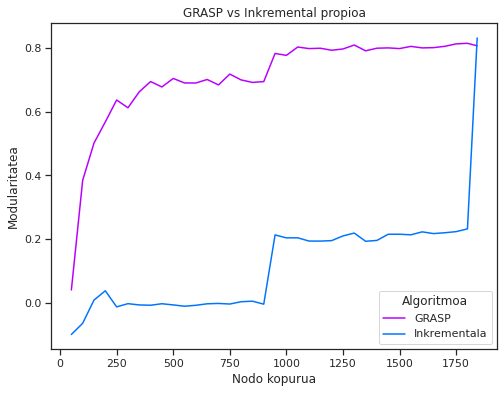

In [ ]:
sns.set()
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_palette("hsv_r",4)
sns.lineplot(x="Nodo kopurua", y="Modularitatea",hue='Algoritmoa', data=dataFit).set_title('GRASP vs Inkremental propioa')

#K balioak

In [ ]:
df = pd.read_csv(directory + "data/emaitzak/k_SA.csv")
dfi = pd.read_csv(directory + "data/emaitzak/k_GRASP.csv")
#print(dfi.head(10))

df = df.drop(['Evals', "Instantzia", "Ingurunea", "Denbora(s)", "n",], axis = 1)
dfi = dfi.drop(["Instantzia", "Denbora(s)", "n",], axis = 1)

In [ ]:
dfi

,k,Algoritmoa,Fitness
0,5,GRASP,0.644970
1,5,GRASP,0.565089
2,5,GRASP,0.676775
3,5,GRASP,0.599852
4,5,GRASP,0.639053
...,...,...,...
893,1800,GRASP,0.005331
894,1800,GRASP,0.005903
895,1800,GRASP,0.005903
896,1800,GRASP,0.006474


In [ ]:
a = pd.concat([df,dfi])

In [ ]:
a.rename(columns = {'Fitness':'Modularitatea'}, inplace = True)

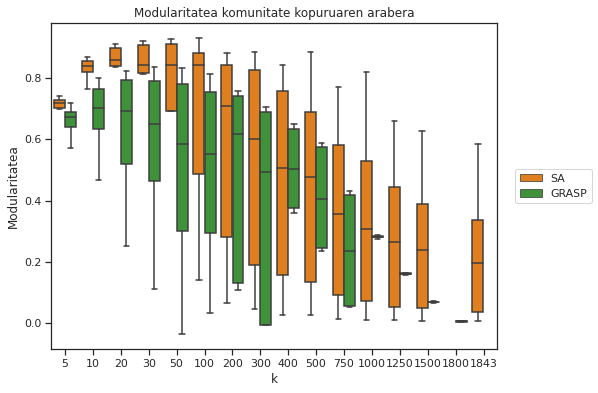

In [ ]:
sns.set()
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("white")
sns.set_style("ticks")
sns.set_palette("Paired_r",2)
sns.boxplot(x='k', y='Modularitatea', data=a, showfliers=False, hue="Algoritmoa").set_title('Modularitatea komunitate kopuruaren arabera')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

In [ ]:
a = pd.melt(a, id_vars=['Algoritmoa'])

In [ ]:
a

,Algoritmoa,variable,value
0,SA,k,5.000000
1,SA,k,10.000000
2,SA,k,20.000000
3,SA,k,30.000000
4,SA,k,50.000000
...,...,...,...
2541,GRASP,Fitness,0.005331
2542,GRASP,Fitness,0.005903
2543,GRASP,Fitness,0.005903
2544,GRASP,Fitness,0.006474


In [ ]:
df1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=2)
df3 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=3)



In [ ]:
df1

,1,2,3,4,5,Trial
0,0.680950,-0.200109,-0.616478,1.011490,0.643012,1
1,-1.695735,-2.486758,1.347484,1.112481,-1.912495,1
2,-0.545189,-0.153998,-0.737573,-0.431168,-0.656183,1
3,-0.672485,-1.357161,-1.882678,-2.838895,-1.255754,1
4,1.640407,0.190754,-0.165475,-0.562661,2.087495,1


In [ ]:
df1
cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

In [ ]:
ks = df["k"]
fs = df["Fitness"]
ksi = dfi["k"]
fsi = dfi["Fitness"]

In [ ]:
ks = df["k"].to_numpy()
fs = df["Fitness"]
ksi = dfi["k"]
fsi = dfi["Fitness"]

In [ ]:
#ks = ks.to_numpy()
ks

array([   5,   10,   20,   30,   50,  100,  200,  300,  400,  500,  750,
       1000, 1250, 1500, 1843,    5,   10,   20,   30,   50,  100,  200,
        300,  400,  500,  750, 1000, 1250, 1500, 1843,    5,   10,   20,
         30,   50,  100,  200,  300,  400,  500,  750, 1000, 1250, 1500,
       1843,    5,   10,   20,   30,   50,  100,  200,  300,  400,  500,
        750, 1000, 1250, 1500, 1843,    5,   10,   20,   30,   50,  100,
        200,  300,  400,  500,  750, 1000, 1250, 1500, 1843,    5,    5,
          5,   10,   10,   10,   20,   20,   20,   30,   30,   30,   50,
         50,   50,  100,  100,  100,  200,  200,  200,  300,  300,  300,
        400,  400,  400,  500,  500,  500,  750,  750,  750, 1000, 1000,
       1000, 1250, 1250, 1250, 1500, 1500, 1500, 1843, 1843, 1843,    5,
          5,    5,   10,   10,   10,   20,   20,   20,   30,   30,   30,
         50,   50,   50,  100,  100,  100,  200,  200,  200,  300,  300,
        300,  400,  400,  400,  500,  500,  500,  7

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


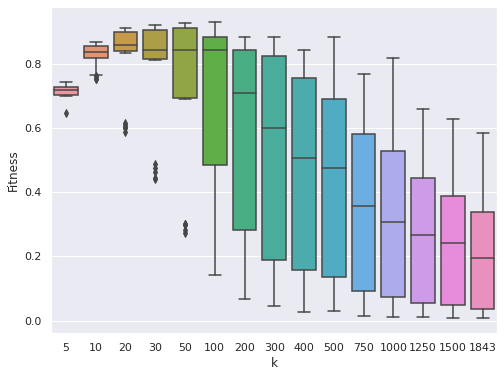

In [ ]:
sns.set()
sns.set(rc={'figure.figsize':(8,6)})
# Use the heatmap function from the seaborn package
sns.boxplot(ks,fs)